In [13]:
#安装依赖
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 读取数据
train_data = pd.read_excel('Data4Regression.xlsx', sheet_name='Training Data')
test_data = pd.read_excel('Data4Regression.xlsx', sheet_name='Test Data')


X_train = train_data[['x']].values
y_train = train_data['y_complex'].values
X_test = test_data[['x_new']].values
y_test = test_data['y_new_complex'].values

# 最小二乘法
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred_ls = lr.predict(X_train)
test_pred_ls = lr.predict(X_test)
train_error_ls = mean_squared_error(y_train, train_pred_ls)
test_error_ls = mean_squared_error(y_test, test_pred_ls)

# 梯度下降法
def gradient_descent(X, y, alpha=0.01, iterations=10000):
    m = X.shape[0]
    theta = np.zeros(X.shape[1])
    for _ in range(iterations):
        error = X.dot(theta) - y
        gradient = (1/m) * X.T.dot(error)
        theta -= alpha * gradient
    return theta

X_train_gd = np.hstack([np.ones((len(X_train), 1)), X_train])
X_test_gd = np.hstack([np.ones((len(X_test), 1)), X_test])

theta_gd = gradient_descent(X_train_gd, y_train)
train_pred_gd = X_train_gd.dot(theta_gd)
test_pred_gd = X_test_gd.dot(theta_gd)
train_error_gd = mean_squared_error(y_train, train_pred_gd)
test_error_gd = mean_squared_error(y_test, test_pred_gd)

# 牛顿法
def newton_method(X, y):
    XtX = X.T.dot(X)
    XtX_inv = np.linalg.inv(XtX)
    return XtX_inv.dot(X.T.dot(y))

theta_newton = newton_method(X_train_gd, y_train)
train_pred_nt = X_train_gd.dot(theta_newton)
test_pred_nt = X_test_gd.dot(theta_newton)
train_error_nt = mean_squared_error(y_train, train_pred_nt)
test_error_nt = mean_squared_error(y_test, test_pred_nt)

# 结果输出
print("最小二乘法：")
print(f"训练误差：{train_error_ls:.4f}, 测试误差：{test_error_ls:.4f}")
print("梯度下降法：")
print(f"训练误差：{train_error_gd:.4f}, 测试误差：{test_error_gd:.4f}")
print("牛顿法：")
print(f"训练误差：{train_error_nt:.4f}, 测试误差：{test_error_nt:.4f}")

最小二乘法：
训练误差：0.6134, 测试误差：0.5950
梯度下降法：
训练误差：0.6134, 测试误差：0.5950
牛顿法：
训练误差：0.6134, 测试误差：0.5950



多项式回归（20次）：
训练误差：0.5654, 测试误差：0.5346


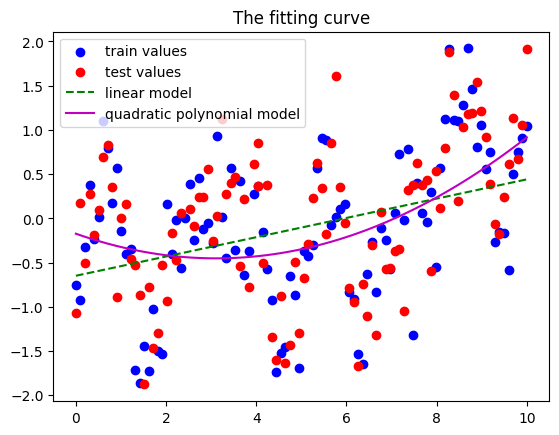

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 多项式回归（20次）
poly_model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
poly_model.fit(X_train, y_train)

# 计算误差
train_pred_poly = poly_model.predict(X_train)
test_pred_poly = poly_model.predict(X_test)
train_error_poly = mean_squared_error(y_train, train_pred_poly)
test_error_poly = mean_squared_error(y_test, test_pred_poly)

print("\n多项式回归（20次）：")
print(f"训练误差：{train_error_poly:.4f}, 测试误差：{test_error_poly:.4f}")


# 绘制拟合曲线
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', label='train values')
plt.scatter(X_test, y_test, color='red', label='test values')
x_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
y_plot_linear = lr.predict(x_plot)
y_plot_poly = poly_model.predict(x_plot)
plt.plot(x_plot, y_plot_linear, 'g--', label='linear model')
plt.plot(x_plot, y_plot_poly, 'm-', label='quadratic polynomial model')
plt.legend()
plt.title('The fitting curve')
plt.savefig("1.png")
plt.show()

=== 不同多项式次数误差对比 ===
Degree 1: Train Error = 0.6134, Test Error = 0.5950
Degree 2: Train Error = 0.5654, Test Error = 0.5346
Degree 3: Train Error = 0.5653, Test Error = 0.5368
Degree 4: Train Error = 0.5559, Test Error = 0.5418
Degree 5: Train Error = 0.5252, Test Error = 0.5151
Degree 6: Train Error = 0.5252, Test Error = 0.5151
Degree 7: Train Error = 0.4651, Test Error = 0.4631
Degree 8: Train Error = 0.4614, Test Error = 0.4620
Degree 9: Train Error = 0.3541, Test Error = 0.3875
Degree 10: Train Error = 0.3497, Test Error = 0.3837
Degree 11: Train Error = 0.3013, Test Error = 0.3392
Degree 12: Train Error = 0.3115, Test Error = 0.3462
Degree 13: Train Error = 0.3822, Test Error = 0.3935
Degree 14: Train Error = 0.4255, Test Error = 0.4367
Degree 15: Train Error = 0.4327, Test Error = 0.4389
Degree 16: Train Error = 0.4455, Test Error = 0.4642
Degree 17: Train Error = 0.4487, Test Error = 0.4686
Degree 18: Train Error = 0.4489, Test Error = 0.4691
Degree 19: Train Error = 0.4489, Te

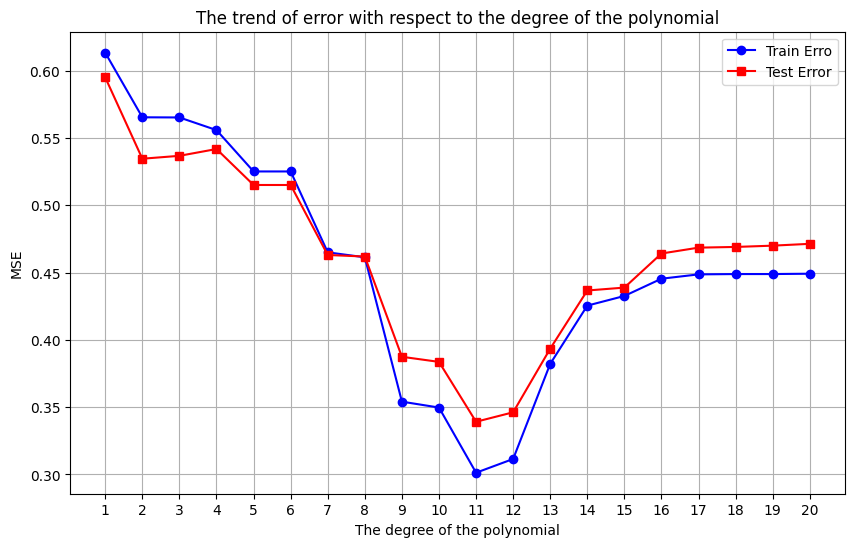

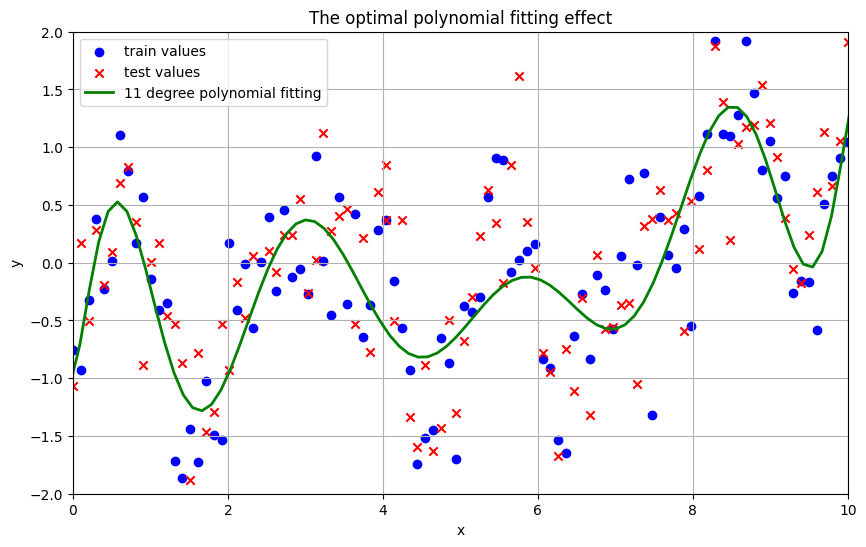

In [34]:

# 实验不同多项式次数
max_degree = 20  # 最大尝试多项式次数
train_errors = []
test_errors = []

for degree in range(1, max_degree+1):
    # 创建多项式模型
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    # 训练模型
    model.fit(X_train, y_train)
    
    # 计算误差
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# 找到最佳多项式次数
best_degree = np.argmin(test_errors) + 1  # +1因为索引从0开始

# 结果输出
print("=== 不同多项式次数误差对比 ===")
for degree in range(max_degree):
    print(f"Degree {degree+1}: Train Error = {train_errors[degree]:.4f}, Test Error = {test_errors[degree]:.4f}")

print(f"\n最佳多项式次数：{best_degree}次")
print(f"对应测试误差：{test_errors[best_degree-1]:.4f}")

# 误差趋势可视化
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree+1), train_errors, 'bo-', label='Train Erro')
plt.plot(range(1, max_degree+1), test_errors, 'rs-', label='Test Error')
plt.xlabel('The degree of the polynomial')
plt.ylabel('MSE')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.legend()
plt.title('The trend of error with respect to the degree of the polynomial')

plt.savefig("2.png")
plt.show()
# 最佳模型可视化
best_model = make_pipeline(
    PolynomialFeatures(degree=best_degree),
    LinearRegression()
)
best_model.fit(X_train, y_train)

x_plot = np.linspace(X_train.min()-1, X_train.max()+1, 100).reshape(-1,1)
y_plot = best_model.predict(x_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='train values')
plt.scatter(X_test, y_test, c='r', marker='x', label='test values')
plt.plot(x_plot, y_plot, 'g-', lw=2, label=f'{best_degree} degree polynomial fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0,10,-2,2])
plt.legend()
plt.grid(True)
plt.title('The optimal polynomial fitting effect')

plt.savefig("3.png")
plt.show()